<a href="https://colab.research.google.com/github/pankajroy97/CIP-Data-Science-Internship/blob/main/Mobile_Price_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

In [ ]:
# Importing Matplotlib
import matplotlib.pyplot as plt
# plt is athe alias name for pyplot
import pandas as pd
# pd is the alias for pandas
import seaborn as sns
# seaborn is aliased as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_data=pd.read_csv('/content/train.csv')

In [ ]:
test_data=pd.read_csv('/content/test.csv')

In [ ]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
train_data.shape,test_data.shape

((2000, 21), (1000, 21))

In [ ]:
test_data.drop('id',axis=1,inplace=True)

In [ ]:
test_data.shape

(1000, 20)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

In [ ]:
train_data['price_range'].unique()

array([1, 2, 3, 0])

###Lets some EDA in train database

In [ ]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


*Here we can say that price range column and ram correlation value high but under limit (-1 to 1). So we can continue our dataset for prediction ML model.*

Positive correlation means-if one data column is increase then another column also increase and vice versa.

Negative correlation means-if one data column is increase then another column decrease and vice versa.

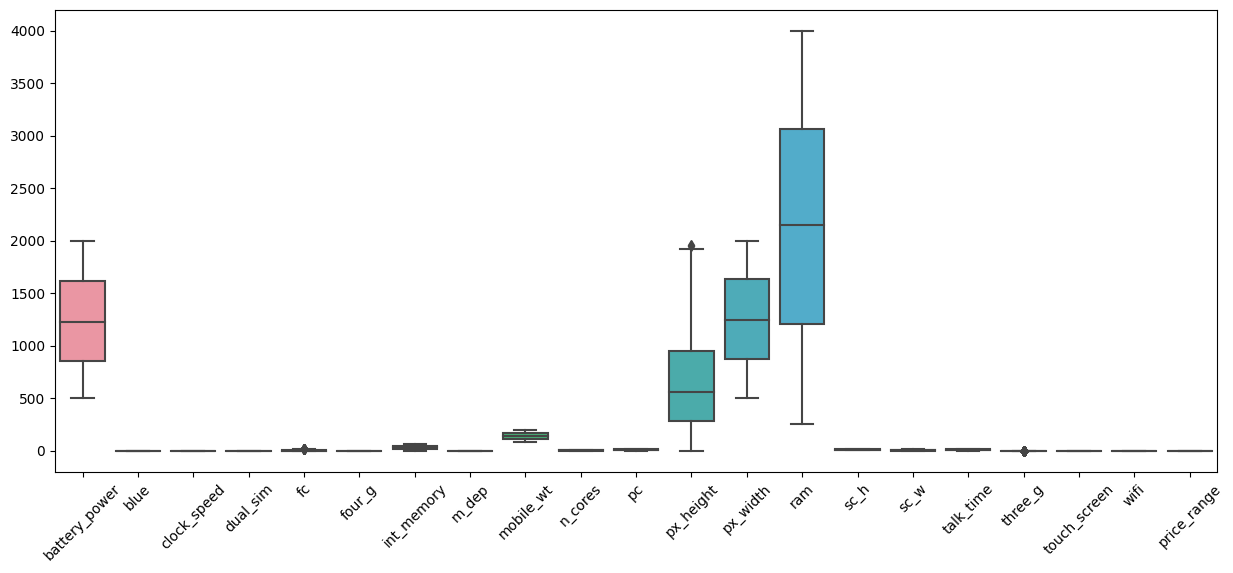

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(train_data)
plt.xticks(rotation=45)
plt.show()

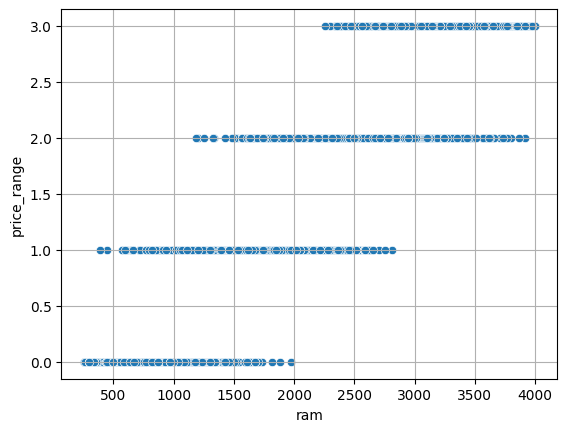

In [ ]:
sns.scatterplot(train_data,x=train_data['ram'],y=train_data['price_range'])
plt.grid()

Here I am clearly see that 

the price_range 0 occurs ram between 250 to 2000

price_range 1 occurs ram between 250 to 3000

price_range 2 occurs ram between 1000 to 4000

price_range 4 occurs ram between 2000 to 4000


<Axes: >

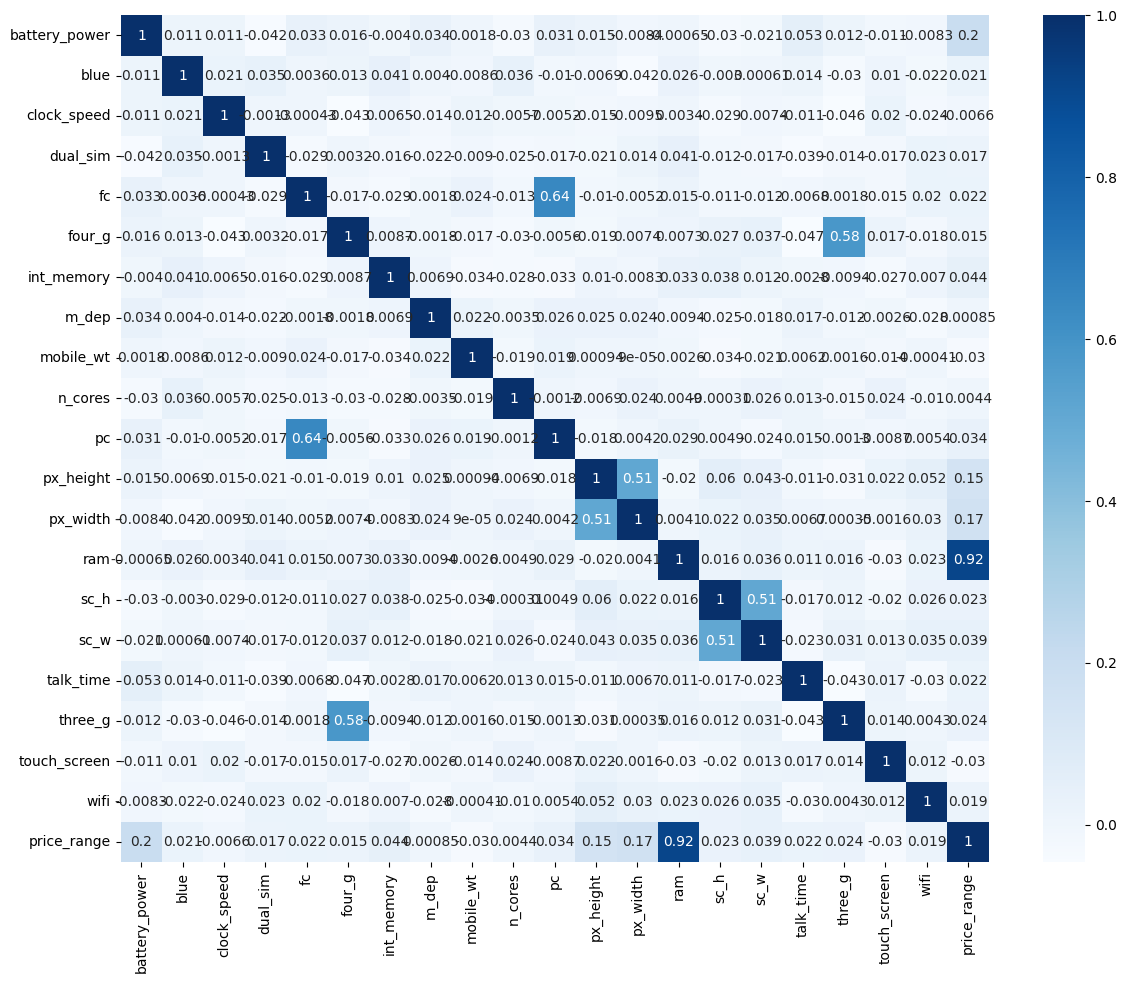

In [ ]:
correlation=train_data.corr()
plt.figure(figsize=(14,11))
sns.heatmap(correlation,annot=True,cmap='Blues')

In [ ]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
x=train_data.iloc[:,0:20]
y=train_data.iloc[:,20]

In [ ]:
x.shape,y.shape

((2000, 20), (2000,))

In [ ]:
x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape

(1600, 20)

In [ ]:
x_test.shape

(400, 20)

In [ ]:
y_train.shape

(1600,)

In [ ]:
y_test.shape

(400,)

LOGISTIC REGRESSION METHOD

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lregression=LogisticRegression()
model_lregression.fit(x_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
prediction_train=model_lregression.predict(x_train)
print("Trainning Accuracy=",accuracy_score(y_train,prediction_train)*100)

Trainning Accuracy= 63.5


In [ ]:
from sklearn.metrics import accuracy_score
prediction_test=model_lregression.predict(x_test)
print("Testing Accuracy=",accuracy_score(prediction_test,y_test)*100)

Testing Accuracy= 63.0


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       112
           1       0.57      0.56      0.56       108
           2       0.44      0.50      0.47        88
           3       0.65      0.67      0.66        92

    accuracy                           0.63       400
   macro avg       0.63      0.62      0.63       400
weighted avg       0.64      0.63      0.64       400

[[86 25  1  0]
 [12 60 27  9]
 [ 0 19 44 25]
 [ 0  1 29 62]]


SUPPORT VECTOR METHOD

In [ ]:
from sklearn.svm import SVC
model_svm=SVC()
model_svm.fit(x_train,y_train)

SVC()

In [ ]:
prediction_train1=model_svm.predict(x_train)
print("Accuracy of trainning dataset",accuracy_score(y_train,prediction_train1)*100)

Accuracy of trainning dataset 94.8125


In [ ]:
prediction_test1=model_svm.predict(x_test)
print("Accuracy of testing dataset",accuracy_score(y_test,prediction_test1)*100)

Accuracy of testing dataset 94.75


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_test1))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       112
           1       0.94      0.94      0.94       108
           2       0.94      0.89      0.91        88
           3       0.95      0.97      0.96        92

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



From this two method, we get 64% accuracy from logistic regression and 95% accuracy from svm.
So svm method accuracy is better than logistic regression accuracy.So We can continue svm method predicted values. 

In [ ]:
prediction=model_lregression.predict(test_data)
prediction

array([2, 3, 1, 3, 2, 2, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 1, 1, 2, 1, 0, 3,
       1, 3, 3, 0, 2, 0, 3, 1, 1, 0, 3, 0, 0, 1, 3, 2, 3, 3, 0, 2, 0, 0,
       0, 1, 1, 3, 1, 2, 3, 1, 2, 1, 3, 0, 3, 1, 1, 3, 3, 3, 1, 1, 0, 2,
       1, 3, 1, 2, 1, 2, 2, 2, 2, 0, 3, 0, 2, 3, 0, 3, 3, 0, 2, 0, 3, 1,
       3, 1, 2, 2, 2, 0, 2, 3, 0, 2, 1, 3, 2, 0, 0, 2, 1, 1, 1, 2, 3, 3,
       3, 2, 1, 3, 2, 2, 3, 1, 3, 0, 0, 3, 3, 1, 2, 0, 3, 3, 2, 1, 0, 2,
       1, 1, 3, 2, 1, 0, 3, 2, 2, 2, 1, 2, 3, 3, 3, 3, 1, 3, 2, 3, 1, 0,
       2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 2,
       1, 0, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 3, 2, 0, 2, 3,
       3, 3, 1, 3, 2, 3, 2, 1, 2, 0, 1, 0, 2, 2, 1, 2, 2, 3, 1, 3, 0, 3,
       2, 2, 2, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 0,
       0, 3, 0, 3, 2, 3, 1, 1, 3, 0, 0, 2, 2, 3, 1, 3, 2, 1, 3, 3, 1, 3,
       3, 3, 3, 2, 0, 2, 1, 2, 2, 1, 3, 2, 0, 3, 0, 2, 1, 0, 0, 3, 2, 2,
       3, 2, 0, 3, 3, 1, 2, 1, 2, 1, 1, 1, 2, 3, 1,

In [ ]:
prediction1=model_svm.predict(test_data)
prediction1

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

###Final prediction of mobile price classification dataset using Support Vector Method Algorithm

In [ ]:
test_data['Predicted Price Range']=prediction1
test_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Predicted Price Range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
